<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://pythonquants.com' target='_blank'>www.pythonquants.com</a>

**Contact us** | <a href='mailto:analytics@pythonquants.com'>analytics@pythonquants.com</a>

# Financial Time Series

In [90]:
import warnings
warnings.simplefilter('ignore')

## pandas Basics

In [91]:
import numpy as np
import pandas as pd

### First Steps with DataFrame Class

In [92]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [93]:
df.index  # the index values

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [94]:
df.columns  # the column names

Index([u'numbers'], dtype='object')

In [95]:
df.ix['c']  # selection via index

numbers    30
Name: c, dtype: int64

In [96]:
df.ix[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [97]:
df.ix[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [98]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [99]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [100]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [101]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [102]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [103]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [104]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
  # temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [105]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [106]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
  # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [107]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [108]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [109]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### Second Steps with DataFrame Class

In [110]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[ 0.264537,  0.14678 , -0.689488, -0.337964],
       [ 1.023117, -0.317069,  0.055553, -0.657145],
       [-0.1735  ,  0.952525,  0.025283, -0.505864],
       [ 0.423219,  0.45288 ,  1.430977, -0.767075],
       [-2.003566, -0.869108,  0.329303,  0.682692],
       [ 1.355194,  0.033007,  1.417262,  1.713483],
       [ 1.038613,  0.791532, -0.18061 ,  1.264699],
       [-1.665398,  0.066407,  2.137817,  0.015985],
       [ 0.499518,  0.17674 ,  0.645106,  0.154694]])

In [111]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,0.264537,0.146780,-0.689488,-0.337964
1,1.023117,-0.317069,0.055553,-0.657145
2,-0.173500,0.952525,0.025283,-0.505864
3,0.423219,0.452880,1.430977,-0.767075
4,-2.003566,-0.869108,0.329303,0.682692
5,1.355194,0.033007,1.417262,1.713483
6,1.038613,0.791532,-0.180610,1.264699
7,-1.665398,0.066407,2.137817,0.015985
8,0.499518,0.176740,0.645106,0.154694


In [112]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,0.264537,0.146780,-0.689488,-0.337964
1,1.023117,-0.317069,0.055553,-0.657145
2,-0.173500,0.952525,0.025283,-0.505864
3,0.423219,0.452880,1.430977,-0.767075
4,-2.003566,-0.869108,0.329303,0.682692
5,1.355194,0.033007,1.417262,1.713483
6,1.038613,0.791532,-0.180610,1.264699
7,-1.665398,0.066407,2.137817,0.015985
8,0.499518,0.176740,0.645106,0.154694


In [113]:
df['No2'][3]  # value in column No2 at index position 3

0.45287995625614208

In [114]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [115]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,0.264537,0.146780,-0.689488,-0.337964
2015-02-28,1.023117,-0.317069,0.055553,-0.657145
2015-03-31,-0.173500,0.952525,0.025283,-0.505864
2015-04-30,0.423219,0.452880,1.430977,-0.767075
2015-05-31,-2.003566,-0.869108,0.329303,0.682692
2015-06-30,1.355194,0.033007,1.417262,1.713483
2015-07-31,1.038613,0.791532,-0.180610,1.264699
2015-08-31,-1.665398,0.066407,2.137817,0.015985
2015-09-30,0.499518,0.176740,0.645106,0.154694


In [116]:
np.array(df).round(6)

array([[ 0.264537,  0.14678 , -0.689488, -0.337964],
       [ 1.023117, -0.317069,  0.055553, -0.657145],
       [-0.1735  ,  0.952525,  0.025283, -0.505864],
       [ 0.423219,  0.45288 ,  1.430977, -0.767075],
       [-2.003566, -0.869108,  0.329303,  0.682692],
       [ 1.355194,  0.033007,  1.417262,  1.713483],
       [ 1.038613,  0.791532, -0.18061 ,  1.264699],
       [-1.665398,  0.066407,  2.137817,  0.015985],
       [ 0.499518,  0.17674 ,  0.645106,  0.154694]])

### Basic Analytics

In [117]:
df.sum()

No1    0.761736
No2    1.433694
No3    5.171202
No4    1.563504
dtype: float64

In [118]:
df.mean()

No1    0.084637
No2    0.159299
No3    0.574578
No4    0.173723
dtype: float64

In [119]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,0.264537,0.146780,-0.689488,-0.337964
2015-02-28,1.287654,-0.170289,-0.633936,-0.995109
2015-03-31,1.114154,0.782236,-0.608652,-1.500973
2015-04-30,1.537374,1.235116,0.822325,-2.268048
2015-05-31,-0.466193,0.366008,1.151627,-1.585356
2015-06-30,0.889002,0.399015,2.568889,0.128127
2015-07-31,1.927615,1.190547,2.388279,1.392825
2015-08-31,0.262217,1.256954,4.526096,1.408810
2015-09-30,0.761736,1.433694,5.171202,1.563504


In [120]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.084637,0.159299,0.574578,0.173723
std,1.183961,0.550534,0.914581,0.876391
min,-2.003566,-0.869108,-0.689488,-0.767075
25%,-0.173500,0.033007,0.025283,-0.505864
50%,0.423219,0.146780,0.329303,0.015985
75%,1.023117,0.452880,1.417262,0.682692
max,1.355194,0.952525,2.137817,1.713483


In [121]:
np.sqrt(df)

,No1,No2,No3,No4
2015-01-31,0.514331,0.383118,NaN,NaN
2015-02-28,1.011493,NaN,0.235696,NaN
2015-03-31,NaN,0.975974,0.159007,NaN
2015-04-30,0.650553,0.672964,1.196235,NaN
2015-05-31,NaN,NaN,0.573849,0.826252
2015-06-30,1.164128,0.181679,1.190488,1.309001
2015-07-31,1.019124,0.889681,NaN,1.124588
2015-08-31,NaN,0.257695,1.462128,0.126430
2015-09-30,0.706766,0.420405,0.803185,0.393311


In [122]:
np.sqrt(df).sum()

No1    5.066395
No2    3.781515
No3    5.620587
No4    3.779582
dtype: float64

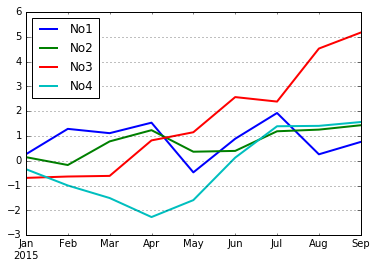

In [123]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

### Series Class

In [124]:
type(df)

pandas.core.frame.DataFrame

In [125]:
df['No1']

2015-01-31    0.264537
2015-02-28    1.023117
2015-03-31   -0.173500
2015-04-30    0.423219
2015-05-31   -2.003566
2015-06-30    1.355194
2015-07-31    1.038613
2015-08-31   -1.665398
2015-09-30    0.499518
Freq: M, Name: No1, dtype: float64

In [126]:
type(df['No1'])

pandas.core.series.Series

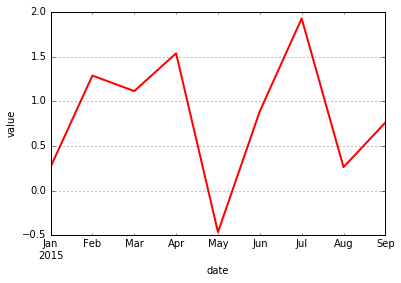

In [127]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')
# tag: time_series
# title: Line plot of a Series object

### GroupBy Operations

In [128]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,0.264537,0.146780,-0.689488,-0.337964,Q1
2015-02-28,1.023117,-0.317069,0.055553,-0.657145,Q1
2015-03-31,-0.173500,0.952525,0.025283,-0.505864,Q1
2015-04-30,0.423219,0.452880,1.430977,-0.767075,Q2
2015-05-31,-2.003566,-0.869108,0.329303,0.682692,Q2
2015-06-30,1.355194,0.033007,1.417262,1.713483,Q2
2015-07-31,1.038613,0.791532,-0.180610,1.264699,Q3
2015-08-31,-1.665398,0.066407,2.137817,0.015985,Q3
2015-09-30,0.499518,0.176740,0.645106,0.154694,Q3


In [129]:
groups = df.groupby('Quarter')

In [130]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.371385,0.260745,-0.202884,-0.500324
Q2,-0.075051,-0.127740,1.059181,0.543033
Q3,-0.042422,0.344893,0.867438,0.478459


In [131]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,1.023117,0.952525,0.055553,-0.337964
Q2,1.355194,0.452880,1.430977,1.713483
Q3,1.038613,0.791532,2.137817,1.264699


In [132]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [133]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [134]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [135]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [136]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even      1.023117 -0.317069  0.055553 -0.657145
        Odd       0.045519  0.549652 -0.332103 -0.421914
Q2      Even      0.889207  0.242944  1.424119  0.473204
        Odd      -2.003566 -0.869108  0.329303  0.682692
Q3      Even     -1.665398  0.066407  2.137817  0.015985
        Odd       0.769066  0.484136  0.232248  0.709696

## Financial Data

In [137]:
import pandas.io.data as web

In [138]:
DAX = web.DataReader(name='^GDAXI', data_source='yahoo',
                     start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4218 entries, 2000-01-03 to 2016-07-22
Data columns (total 6 columns):
Open         4218 non-null float64
High         4218 non-null float64
Low          4218 non-null float64
Close        4218 non-null float64
Volume       4218 non-null int64
Adj Close    4218 non-null float64
dtypes: float64(5), int64(1)
memory usage: 230.7 KB


In [139]:
DAX.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-18,10079.030273,10160.299805,10011.839844,10063.129883,68620600,10063.129883
2016-07-19,10038.950195,10050.769531,9923.639648,9981.240234,67213700,9981.240234
2016-07-20,10054.540039,10146.709961,9991.650391,10142.009766,77317900,10142.009766
2016-07-21,10195.400391,10195.650391,10090.120117,10156.209961,94605600,10156.209961
2016-07-22,10130.509766,10181.240234,10073.280273,10147.459961,60843200,10147.459961


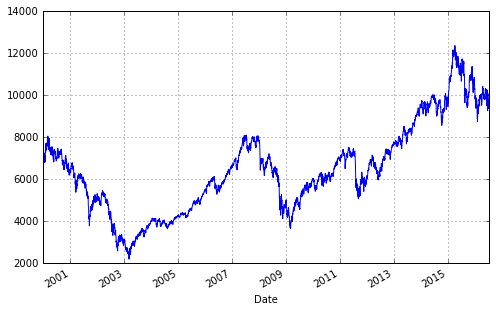

In [140]:
DAX['Close'].plot(figsize=(8, 5), grid=True)
# tag: dax
# title: Historical DAX index levels

In [141]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

Wall time: 84 ms


In [142]:
DAX[['Close', 'Return', 'Return']].tail()

,Close,Return,Return
Date,,,
2016-07-18,10063.129883,-0.000375,-0.000375
2016-07-19,9981.240234,-0.008171,-0.008171
2016-07-20,10142.009766,0.015979,0.015979
2016-07-21,10156.209961,0.001399,0.001399
2016-07-22,10147.459961,-0.000862,-0.000862


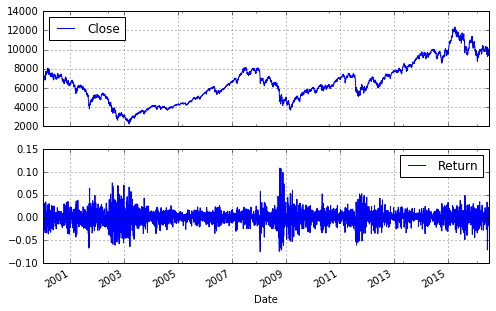

In [143]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True) #对于命令写成 plot(grid=True)或plt.grid = True 似乎应该等价
plt.grid = True
# tag: dax_returns
# title: The DAX index and daily log returns

In [144]:
DAX['42d'] = pd.rolling_mean(DAX['Close'], window=42)
DAX['252d'] = pd.rolling_mean(DAX['Close'], window=252)

In [145]:
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2016-07-18,10063.129883,9891.503116,10155.933900
2016-07-19,9981.240234,9893.055990,10149.825052
2016-07-20,10142.009766,9900.192174,10144.388145
2016-07-21,10156.209961,9902.546945,10139.661001
2016-07-22,10147.459961,9901.171945,10136.054095


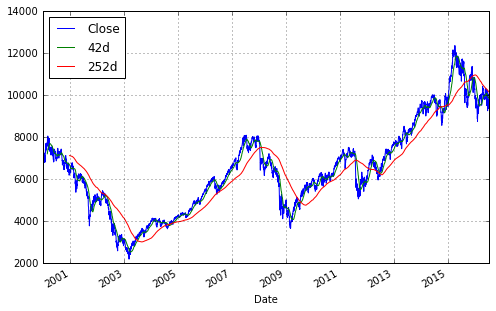

In [146]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)
plt.grid = True
# tag: dax_trends
# title: The DAX index and moving averages

In [147]:
import math
DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'],
                                window=252) * math.sqrt(252)
  # moving annual volatility

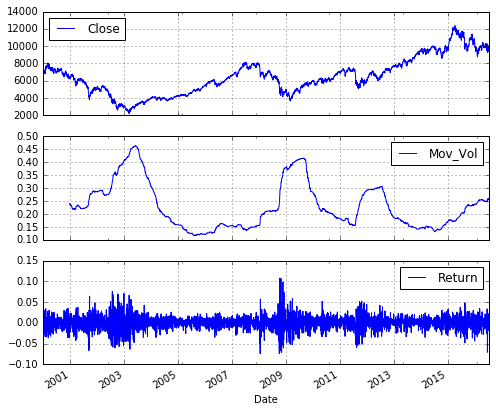

In [148]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True)  #价格与波动性的走势的反向
plt.grid = True
# tag: dax_mov_std
# title: The DAX index and moving, annualized volatility

## Regression Analysis

In [149]:
import pandas as pd
from urllib import urlretrieve

In [150]:
es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
# !ls -o ./data/*.txt # Windows: use dir

('./data/vs.txt', <httplib.HTTPMessage instance at 0x0000000011EE2848>)

In [151]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [152]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [153]:
for line in lines[3883:3890]:
    print line[41:],

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [154]:
new_file = open('./data/es50.txt', 'w')
    # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
    # writes the corrected third line of the orginal file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orginial file
new_file.close()

In [155]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [156]:
es = pd.read_csv('./data/es50.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)

In [157]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-04-26,2923.0,3121.0,347.0,330.0,412.0,354.0,9395.0,588.0,NaN
2016-04-27,2927.0,3130.0,348.0,332.0,413.0,354.0,9424.0,589.0,NaN
2016-04-28,2932.0,3125.0,349.0,332.0,414.0,355.0,9459.0,592.0,NaN
2016-04-29,2856.0,3028.0,341.0,324.0,405.0,349.0,9278.0,582.0,NaN
2016-05-02,2852.0,3033.0,341.0,324.0,405.0,348.0,9238.0,579.0,NaN


In [158]:
del es['DEL'] 
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7562 entries, 1986-12-31 to 2016-05-02
Data columns (total 8 columns):
SX5P    7562 non-null float64
SX5E    7562 non-null float64
SXXP    7562 non-null float64
SXXE    7562 non-null float64
SXXF    7562 non-null float64
SXXA    7562 non-null float64
DK5F    7562 non-null float64
DKXF    7562 non-null float64
dtypes: float64(8)
memory usage: 531.7 KB


In [159]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [160]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-04-26,2922.57,3121.29,347.31,330.30,411.75,353.79,9395.03,587.73
2016-04-27,2927.31,3130.43,348.32,331.69,413.25,354.41,9424.15,589.23
2016-04-28,2932.00,3125.43,348.90,331.76,413.78,355.47,9459.04,591.95
2016-04-29,2856.28,3028.21,341.48,323.70,404.71,348.87,9278.19,581.67
2016-05-02,2852.10,3032.60,341.24,324.22,404.91,347.90,9238.16,578.79


In [161]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [162]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [172]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4443 entries, 1999-01-04 to 2016-05-02
Data columns (total 2 columns):
EUROSTOXX    4443 non-null float64
VSTOXX       4443 non-null float64
dtypes: float64(2)
memory usage: 104.1 KB


In [164]:
data.tail()

,EUROSTOXX,VSTOXX
2016-04-26,3121.29,35.6846
2016-04-27,3130.43,35.6846
2016-04-28,3125.43,35.6846
2016-04-29,3028.21,35.6846
2016-05-02,3032.60,35.6846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011805E80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BCA76D8>], dtype=object)

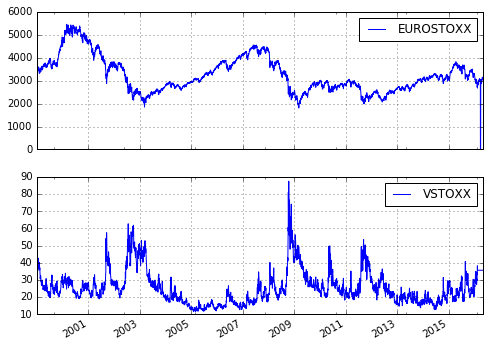

In [165]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs
# title: The EURO STOXX 50 Index and the VSTOXX volatility index

In [166]:
rets = np.log(data / data.shift(1)) 
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011FF44E0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000118102E8>], dtype=object)

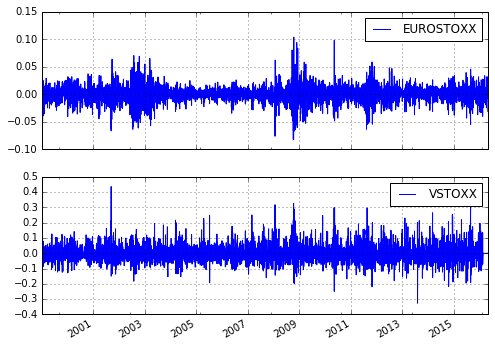

In [167]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs_rets
# title: Log returns of EURO STOXX 50 and VSTOXX

In [170]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = pd.ols(y=ydat, x=xdat,)
model

ValueError: array must not contain infs or NaNs

In [171]:
model.beta
pd.ols?

In [ ]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [ ]:
rets.corr()

In [ ]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'],
                window=252).plot(grid=True, style='b')
# tag: roll_corr
# title: Rolling correlation between EURO STOXX 50 and VSTOXX

## High Frequency Data

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from urllib import urlretrieve
%matplotlib inline

In [ ]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2

In [ ]:
year = '2015'
month = '08'
days = ['03', '04', '05', '06', '07']
  # dates might need to be updated

In [ ]:
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day),
                       index_col=0, header=0, parse_dates=True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
  # shorter colummn names

In [ ]:
NKE.info()

In [ ]:
NKE['bid'].plot(grid=True)
# tag: aapl
# title: Nike stock tick data for a week

In [ ]:
to_plot = NKE[['bid', 'bdeptht']][
    (NKE.index > dt.datetime(2015, 8, 4, 0, 0))
 &  (NKE.index < dt.datetime(2015, 8, 5, 2, 59))]
  # adjust dates to given data set
to_plot.plot(subplots=True, style='b', figsize=(8, 5), grid=True)
# tag: aapl_day
# title: Apple stock tick data and volume for a trading day

In [ ]:
NKE_resam = NKE.resample(rule='5min', how='mean')
np.round(NKE_resam.head(), 2)

In [ ]:
NKE_resam['bid'].fillna(method='ffill').plot(grid=True)
# tag: aapl_resam
# title: Resampled Apple stock tick data

In [ ]:
def reversal(x):
    return 2 * 95 - x

In [ ]:
NKE_resam['bid'].fillna(method='ffill').apply(reversal).plot(grid=True)
# tag: aapl_resam_apply
# title: Resampled Apple stock tick data with function applied to it

In [ ]:
!rm ./data/*
  # Windows: del /data/*

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>